## Code By: *Apoorav Singh Deo*
## En. No: *2021PHZ8046*

Please don't distribute. This code is meant for the course requirement of PYL800, Indian Institute of Technology Delhi

# Part 1
(To run code in pieces. I have also included files seperately. $\texttt{Part_1_lhs.py}$ and $\texttt{Part_1_rhs.py}$ for just Part 1 of the code. Usually, full part 1 takes $\approx$ 5 minutes to run. So be patient)

Suppose we have a vector $\vec{v} = (2xz+3y^2)\hat{i} + (4yz^2)\hat{j}$. Check the Stokes theorem:

$$\iint (\nabla\times \vec{v})\cdot d\vec{a} = \oint \vec{v}\cdot d\vec{l}$$

using Simpsons method by assuming $h = 10^{−4}$ for the surface between (0, 0, 0) $\rightarrow$ (0, 1, 1).

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from math import *


tol = pow(10, -6) # Tolerance limit for approximating zero is defined


First working out RHS. So integration would be worked out using the scheme in the graph below

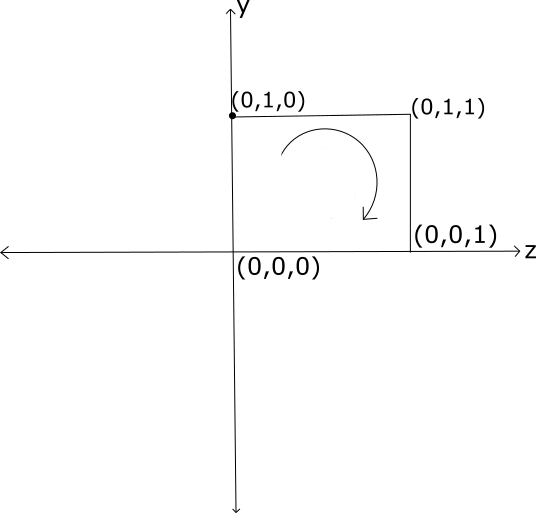

To work this out we will first make a function which will perform the integration and this function would be used step by step to work out whole integration.

In our case we are using simpson rule, which says that

$$\int f(x)\ dx = \frac{h}{3}\left(f(x_0) + f(x_n) + 2f(x_{2i}) + 4f(x_{2i+1}))\right)$$

In [13]:
h1 = 1e-4

tol = pow(10, -6) # Tolerance limit for approximating zero is defined

# Solving for RHS First

# Function definition for simpson's (1/3) rule

def simp_1_3(b, a, h, func):
    
    # b: Upper bound of the Integration
    # a: Lower bound of the Integration
    # h: Step value
    # func: Integrand f(x) only
    
    integr = 0 # To the store the value of the Integration 
    
    n = floor((b-a)/h) # Approximate n to nearest Integer so indexing limit can be defined
    
    n = abs(n)  # Taking absolute value to avoid error with indexing
    
    i = 0
    
    h1 = (b-a)/n
    
    x = np.empty(n)
    
    x[0] = a
    
    while (i < n):
        
        x[i] = i*h1 + a
        
        if (i%2 == 0 and i != (n-1) and i != 0):
            
            integr += (h1/3)*2*func(x[i])
            
        elif (i%2 != 0 and i != (n-1) and i != 0):
            
            integr += (h1/3)*4*func(x[i])
            
        else:
            
            integr += (h1/3)*func(x[i])
         
        i += 1
    return integr


# Case 1: (0,0,0) ----> (0,0,1)

# As function becomes zero therefore answer for this integration is 0.

c_res_1 = 0

# Case 2: (0,0,1) ----> (0,1,1)

def func_2(x):
    
    func = 3*x**2
    return func

c_res_2 = simp_1_3(1, 0, h1, func_2)

# Case 3: (0,1,1) ----> (0,1,0)

def func_3(x):
    
    func = 4*x**2
    return func

c_res_3 = simp_1_3(0, 1, h1, func_3)


# Case 4: (0,1,0) ----> (0,0,0)

# Due to symmetry of the problem the function is same as func_2(x) defined earlier

c_res_4 = simp_1_3(0, 1, h1, func_2)

# It is to be noted that this code can be written using less function but for the 
# sake of the understanding I have implemented these functions

rhs_res = c_res_1 + c_res_2 + c_res_3 + c_res_4

print("Value of the Integral in RHS {}".format((abs(rhs_res))))

Value of the Integral in RHS 1.3337332733293232


 $$\oint \vec{v}\cdot d\vec{l} = 1.3337332733293232$$
 
 Now working out the LHS

Now writing a function for double integration${}^+$ (Alexander (https://math.stackexchange.com/users/806961/alexander), Simpson rule for double integral, URL (version: 2021-04-29): https://math.stackexchange.com/q/4104609).

$$S_x(y_j) = f(x_0, y_j) + f(x_n,y_j) + 4\sum_{i = 1}^{(N_x-2)/2} f(x_{2i-1},y_j) + 2\sum_{i = 1}^{(N_x-2)/2} f(x_{2i},y_j)$$

and 

$$S = \frac{h_xh_y}{9}[(S_x(y_0) +S_x(y_n) + 4\sum_{j = 1}^{(N_y-2)/2} S_x(y_{2j-1}) + 2\sum_{j = 1}^{(N_y-2)/2} S_x(y_{2j})$$

where,

$$h_x = \frac{\text{UpperLimit}_x - \text{LowerLimit}_x}{N_x}$$

and 

$$h_y = \frac{\text{UpperLimit}_y - \text{LowerLimit}_y}{N_y}$$

In [14]:
# Function definition

def func_xy(y, x):
    
    func = 4*y**2
    
    return func


# This function is modified simpson function, in which function can take f(x,y) value. Rest all is same

def simp_1_3m(b, a, h1, y, func):
#           'm' stands for modified    
    integr = 0
    
    n = floor((b-a)/h1)
    
    n = abs(n)
    
    i = 0
    
    x = np.empty(n)
    
    x[0] = a
    
    while (i < n):
        
        x[i] = i*h1 + a
        
        if (i%2 == 0 and i != (n-1) and i != 0):
            
            integr += 2*func(y, x[i])
            
        elif (i%2 != 0 and i != (n-1) and i != 0):
            
            integr += 4*func(y, x[i])
            
        else:
            
            integr += func(y, x[i])
         
        i += 1
    return integr


def d_simp_1_3(bx, ax, by, ay, hx, hy, func):
    # --------------------------------------
    # ax: Lower bound dx
    # bx: Upper bound dx
    # by: Upper bound dy
    # ay: Lower bound dy
    # hx: Step Size x-axis 
    # hy: Step Size y-axis
    # func: Input function of the Integrand
    # ---------------------------------------
    
                 # Will store the integration value
    integr_y = 0 #
    
    
    nx = floor((bx-ax)/hx) # Steps in x axis
    # Approximate n to nearest Integer so indexing limit can be defined
    
    nx = abs(nx) # Taking absolute value to avoid error with indexing
    
    ny = floor((by-ay)/hy) # Steps in y axis
    # Approximate n to nearest Integer so indexing limit can be defined
    
    ny = abs(ny) # Taking absolute value to avoid error with indexing
    
    i = 0 #(Inner Iteration)
    j = 0 #(Outer Iteration)
    
    h1x = (bx-ax)/nx # | In this way we can also handle the Integrals
    h1y = (by-ay)/ny # | that have b<a. As it adjusts the 
    
    x = np.empty(nx) #
                     # Initializing the variables  
    y = np.empty(ny) #
    
    x[0] = ax #
              # Initializing the variables
    y[0] = ay #
    
    for j in range(ny):
        
        y[j] = j*h1y + ay
        
        # Instead of nesting I have used modified simpson function I used earlier
        
        if (j%2 == 0 and j != (ny-1) and j != 0):
                
            integr_y += (h1x*h1y/9)*2*simp_1_3m(bx, ax, h1x, y[j], func)
        
        elif (j%2 != 0 and j != (ny-1) and j != 0):
            
            integr_y += (h1x*h1y/9)*4*simp_1_3m(bx, ax, h1x, y[j], func)
            
        else:
            
            integr_y += (h1x*h1y/9)*simp_1_3m(bx, ax, h1x, y[j], func)

    return integr_y

lhs_res = d_simp_1_3(1, 0, 1, 0, 0.0001, 0.0001, func_xy) # Calling the function 

print("Value of the Integral in LHS {}".format((lhs_res))) # Printing the value

Value of the Integral in LHS 1.3326223733186628


$$\iint (\nabla\times \vec{v})\cdot d\vec{a} = 1.3326223733186628$$

Hence, LHS and RHS are nearly equal (error is due to numerical integration). Therefore, Stoke's theorem is proved.

# Part 2

(To run code in pieces. I have also included files seperately. $\texttt{Part_2.py}$ for just Part 2 of the code)

Suppose a body of mass $m$ is traveling vertically upward starting at the surface of the earth. If all resistance except gravity is neglected, the escape velocity of $v$ is given by 
$$v^2 = 2gR\int^{\infty}_{1} z^{-2}\ dz$$
and $R=3960\ miles$ is the radius of the earth, and $g = 0.00609\ mi/s^2$ is the force of the gravity at the surface. Approximate the escape velocity by assuming $h = 10^{-3}$?

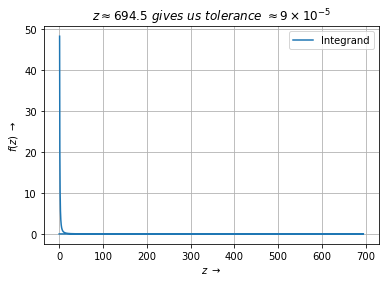

In [15]:
arry_lim = 1000000 # Safe Array Size
h = 1e-3 #[Step Size]

# In this block of the code, infinity would be materialized

g = 0.00609 #[mi/s^2]
R = 3960 #[miles]

z = np.zeros(arry_lim)
pl_f_z = np.zeros(arry_lim)
trap = 0

# Function definition 

def func_v_2(z):
    f_z = 2*g*R*(1/pow(z,2))
    return f_z

# Initializing the function

z[0] = 1
i = 0

# Loop to plot the function 

while (pl_f_z[i] < tol):
    
    pl_f_z[i] = func_v_2(z[i])
    
    if (z[i] >= 695):
        break
    
    z[i+1] = z[i] + h
    # z_i+1 is placed here to avoid mismatch of array size
    
    i += 1

plt.plot(z, pl_f_z, label='Integrand')    
plt.xlabel(r"$z\ \rightarrow$")
plt.ylabel(r"$f(z)\ \rightarrow$")
plt.grid(1)
plt.title(r"$z \approx 694.5\ gives\ us\ tolerance\ \approx 9 \times 10^{-5}$")
plt.legend()

To estimate infinity, I used the fuunction to approximate zero. As function is assymptotically tending to zero. Therefore, at 
a certain value we can say that value is sufficiently close to zero ($\lim\limits_{z \rightarrow 0}\ f(z)$). Hence, it can be safely said that the particular value is a good approximation to $\infty$.

For instance, in our case; at $694.5$ miles we get  function value $0.9...\times 10^{-6}$. Which is a good approximation keeping in mind the computation resource and time we have.

Now implementing the integration using **trapezoidal rule**.

$$v^2 = 2gR\int^{\infty}_{1} z^{-2}\ dz$$

**Trapezoidal rule** says that Integration can be numerically computed using the formula,

$$\frac{f(b) - f(a)}{2}\times (b-a)$$

In composite form (as done in this code) $(b-a)$ is nothing but step size, $b$ is $x_{i+1}$ and $a$ is $x_{i}$. 

It is to be noted that integration is done for $v^2$. Therefore, we need to take square root of the last value obtained to get the value of escape velocity.

**Ans.** $\sqrt{v}$

In [16]:
# Implementing Trapezoidal Method

i=1
trap = 0
while True:
    trap += (pl_f_z[i-1] + pl_f_z[i])*h/2
    
    if (z[i] >= 695):
        break
    
    i += 1    
    
# Printing the integration value. 
print("Escape velocity  = {} miles/s".format(sqrt(trap)))

Escape velocity  = 6.939986197855743 miles/s


As we can see answer is displayed here, 

$$\sqrt{2gR\int^{\infty}_{1} z^{-2}\ dz} = 6.939986\ \left(\frac{mi}{s}\right)$$